# Plot figure 9

## Setup

In [51]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy

import numpy as np 
import pickle
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib

import sys
# sys.path.append('/home/av555/iclr/')

matplotlib.rcParams['text.usetex'] = True

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [409]:
x_station = np.load('tmax_all_x_target.npy')
x_station = x_station[np.where(np.logical_and(6.26 <= x_station[:, 0], x_station[:, 0] <= 15.75))]
x_station = x_station[np.where(np.logical_and(47.25 <= x_station[:, 1], x_station[:, 1] <= 54.75))]

## Plot utils

In [410]:
def plot_gpanel(ax, title=False, title_text=None, left=False, top=False, right=False, ylabel=None):
    
    ax.coastlines()
    ax.gridlines()
    ax.set_extent([6.25, 15.75, 47.25, 54.75])
    ax.add_feature(cartopy.feature.OCEAN, zorder=100, edgecolor='k')
    ax.add_feature(cfeature.BORDERS.with_scale('10m'))
    
    if title:
        ax.set_title(title_text, fontsize=22)
    
    if not top:
        ax.set_xticks(ticks=[8, 10, 12, 14])
        ax.set_xticklabels(labels=['$8^\\circ$', '$10^\\circ$', '$12^\\circ$', '$14^\\circ$'])
        ax.tick_params(axis='x', which='major', labelsize=18)
        
    if left:
        ax.set_yticks(ticks=[48, 50, 52, 54])
        ax.set_yticklabels(labels=['$48^\\circ$', '$50^\\circ$', '$52^\\circ$', '$54^\\circ$'])
        ax.tick_params(axis='y', which='major', labelsize=18)
        
    if ylabel:
        ax.set_yticks(ticks=[48, 50, 52, 54])
        ax.set_yticklabels(labels=['$48^\\circ$', '$50^\\circ$', '$52^\\circ$', '$54^\\circ$'])
        ax.set_ylabel(ylabel, fontsize=16)

In [438]:
def plot_grow(ax_list, model_dict, title=False, lower=False, top=False, ylabel=None):
    vmin = -15
    vmax = 15
    
    
    
    if top:
        plot_gpanel(ax_list[0], title=title, title_text="ERA-I Reanalysis", top=top, left=True)
        p = ax_list[0].pcolormesh(model_dict["x_context"][..., 0], 
                                  model_dict["x_context"][..., 1], 
                                  model_dict["reanalysis"], 
                                  cmap="seismic", 
                                  vmin=vmin,
                                  vmax=vmax)
    else:
        plot_gpanel(ax_list[0], title=True, title_text="Train stations", top=top, left=True)
        ax_list[0].scatter(x_station[:, 0], x_station[:, 1], marker='o', color='k', s=1.)
    
    plot_gpanel(ax_list[1], title=title, title_text="Predicted $\mu$", top=top, ylabel=ylabel)
    p = ax_list[1].pcolormesh(model_dict["lon_target"], 
                              model_dict["lat_target"], 
                              model_dict["pred_mean"], 
                              cmap="seismic", 
                              vmin=vmin,
                              vmax=vmax)
    
    plot_gpanel(ax_list[2], title=title, title_text="Sample 1", top=top)
    p = ax_list[2].pcolormesh(model_dict["lon_target"], 
                              model_dict["lat_target"], 
                              model_dict["s1"],
                              cmap="seismic", 
                              vmin=vmin,
                              vmax=vmax)
    
    plot_gpanel(ax_list[3], title=title, title_text="Sample 2", top=top)
    p = ax_list[3].pcolormesh(model_dict["lon_target"], 
                              model_dict["lat_target"], 
                              model_dict["s2"],
                              cmap="seismic", 
                              vmin=vmin,
                              vmax=vmax)
    
    plot_gpanel(ax_list[4], title=title, title_text="Sample 3", right=True, top=top)
    p = ax_list[4].pcolormesh(model_dict["lon_target"], 
                              model_dict["lat_target"], 
                              model_dict["s3"], 
                              cmap="seismic", 
                              vmin=vmin,
                              vmax=vmax)
    return p

In [501]:
def plot_gfigure(convcnp_dict, convgnp_linear_dict, convgnp_kvv_dict):
    
    fig, (r1, r2) = plt.subplots(
        2, 5, subplot_kw={'projection': crs.PlateCarree()}, sharex=True, sharey=True, figsize=(15, 5))
    
    # convCNP
    p = plot_grow(r1, convcnp_dict, title=True, top=True, ylabel="ConvGNP (meanfield)")
    
    # convGNP kvv
    p = plot_grow(r2, convgnp_kvv_dict, title=False, lower=False, ylabel="ConvGNP (kvv)")
    
#     cbar = fig.colorbar(p, ax=np.array([r1, r2]), location='right')
    
    plt.tight_layout(h_pad=1.4, w_pad=1.0)
    plt.savefig('temperature-samples.png', dpi=300)
    plt.show()

#     plt.savefig("/home/av555/iclr/test_figure.png", dpi=150)
    

## Make plots

In [502]:
with open('/Users/stratis/repos/kernelcnp/kernelcnp/experiments/environmental/convCNP.pkl', 'rb') as handle:
    convcnp_dict = pickle.load(handle)

In [503]:
with open('/Users/stratis/repos/kernelcnp/kernelcnp/experiments/environmental/convGNP_linear.pkl', 'rb') as handle:
    convgnp_linear_dict = pickle.load(handle)

In [504]:
with open('/Users/stratis/repos/kernelcnp/kernelcnp/experiments/environmental/convGNP_kvv.pkl', 'rb') as handle:
    convgnp_kvv_dict = pickle.load(handle)

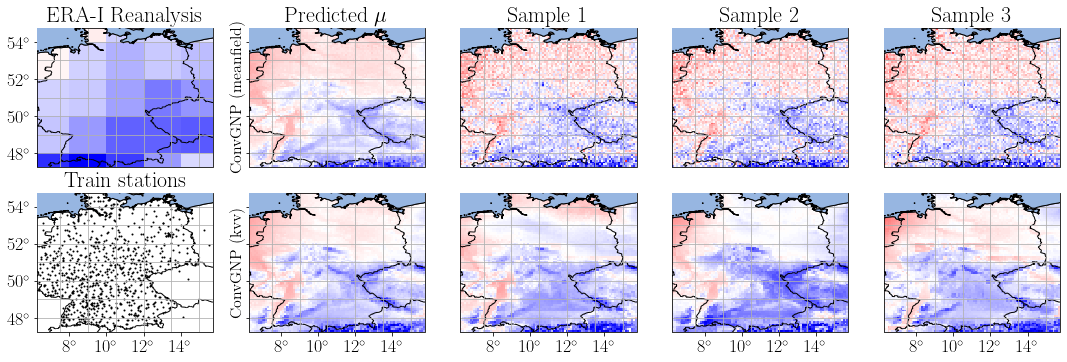

In [505]:
plot_gfigure(convcnp_dict, convgnp_linear_dict, convgnp_kvv_dict)